In [ ]:
# Installed  all required libraries


import sys
!{sys.executable} -m pip install --upgrade pip

# Core libraries
!{sys.executable} -m pip install numpy pandas matplotlib seaborn

# Machine Learning libraries
!{sys.executable} -m pip install scikit-learn joblib

# Optional (if you want notebook to look nice)
!{sys.executable} -m pip install ipywidgets


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error
import joblib

print("Libraries imported successfully!")


Libraries imported successfully!


In [12]:
top_goals = pd.read_csv("top_goals_clean.csv")
pl_tables = pd.read_csv("pl_tables_clean.csv")
match_winner = pd.read_csv("match_winner_clean.csv")
epl_final = pd.read_csv("epl_final_clean.csv")

print("Top Goals:", top_goals.shape)
print("PL Tables:", pl_tables.shape)
print("Match Winner:", match_winner.shape)
print("EPL Final:", epl_final.shape)

top_goals.head()


Top Goals: (324, 19)
PL Tables: (646, 12)
Match Winner: (9380, 22)
EPL Final: (9380, 22)


,Season,Rank,Player,Club,Goals,IsTop10,Position,Age,Appearances,Goals_prev_season,Assists,Penalty_Goals,Non-Penalty_Goals,Goals_per_90,Big_6_Club_Feature,Club_League_Rank,Club_Total_Goals,League_Goals_per_Match,Games_in_Season
0,2023-24,1,Erling Haaland,Manchester City,27,1,Forward,23,31,36.0,6.0,1.0,26,0.85,1.0,1,96,2.83,38.0
1,2023-24,2,Cole Palmer,Chelsea,22,1,Attacking Midfielder,22,33,3.0,11.0,9.0,13,0.61,1.0,6,77,2.83,38.0
2,2023-24,3,Alexander Isak,Newcastle United,21,1,Forward,24,30,10.0,2.0,5.0,16,0.76,0.0,7,85,2.83,38.0
3,2023-24,4,Ollie Watkins,Aston Villa,19,1,Forward,28,37,15.0,13.0,0.0,19,0.51,0.0,4,76,2.83,38.0
4,2023-24,4,Dominic Solanke,AFC Bournemouth,19,1,Forward,26,38,6.0,3.0,1.0,18,0.50,0.0,12,54,2.83,38.0


In [13]:
print(pl_tables.info())
print(pl_tables.describe())
print(pl_tables.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season_end_year  646 non-null    int64 
 1   team             646 non-null    object
 2   position         646 non-null    int64 
 3   played           646 non-null    int64 
 4   won              646 non-null    int64 
 5   drawn            646 non-null    int64 
 6   lost             646 non-null    int64 
 7   gf               646 non-null    int64 
 8   ga               646 non-null    int64 
 9   gd               646 non-null    int64 
 10  points           646 non-null    int64 
 11  notes            646 non-null    object
dtypes: int64(10), object(2)
memory usage: 60.7+ KB
None
       season_end_year    position      played         won       drawn  \
count       646.000000  646.000000  646.000000  646.000000  646.000000   
mean       2008.365325   10.602167   38.408669   14.283282  

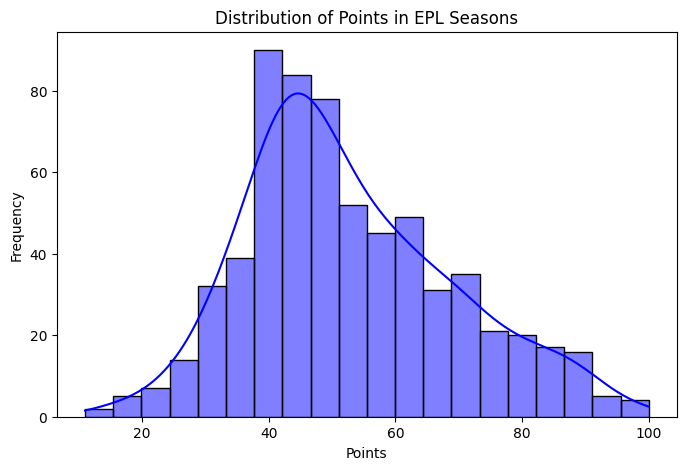

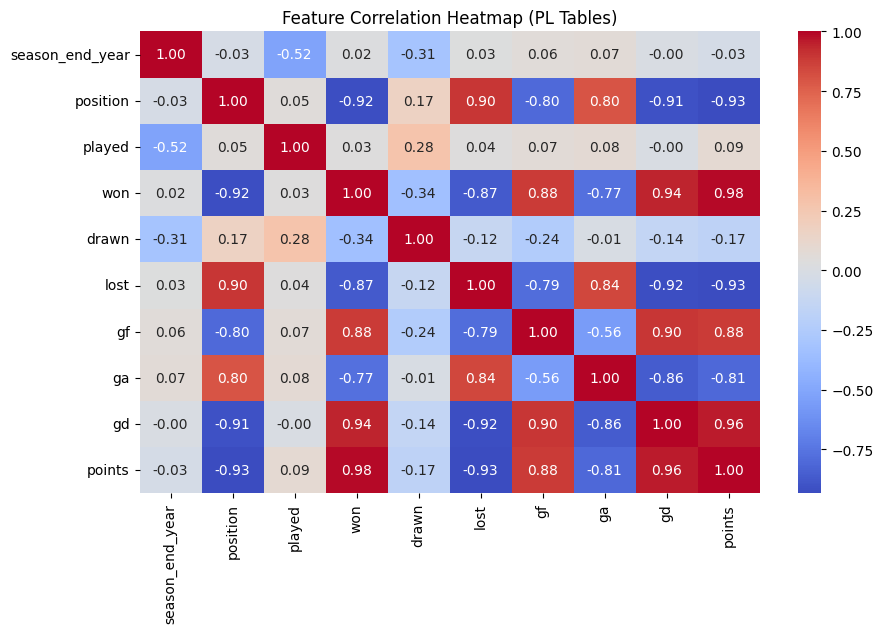

In [15]:
 # Visualizing EPL Standings Data

# Histogram of Points
plt.figure(figsize=(8,5))
sns.histplot(pl_tables['points'], bins=20, kde=True, color="blue")
plt.title("Distribution of Points in EPL Seasons")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

# Select only numeric columns for correlation
numeric_data = pl_tables.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap (PL Tables)")
plt.show()


In [16]:
print("Before:", pl_tables.shape)
pl_tables = pl_tables.drop(columns=['notes'], errors='ignore')
print("After:", pl_tables.shape)


Before: (646, 12)
After: (646, 11)


In [17]:
epl_final = epl_final.rename(columns={
    'FullTimeHomeGoals':'FTHG',
    'FullTimeAwayGoals':'FTAG',
    'FullTimeResult':'FTR',
    'HomeShots':'HS',
    'AwayShots':'AS',
    'HomeShotsOnTarget':'HST',
    'AwayShotsOnTarget':'AST',
    'HomeFouls':'HF',
    'AwayFouls':'AF',
    'HomeYellowCards':'HY',
    'AwayYellowCards':'AY',
    'HomeRedCards':'HR',
    'AwayRedCards':'AR'
})
epl_final.head()


,Season,MatchDate,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HST,AST,HomeCorners,AwayCorners,HF,AF,HY,AY,HR,AR
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


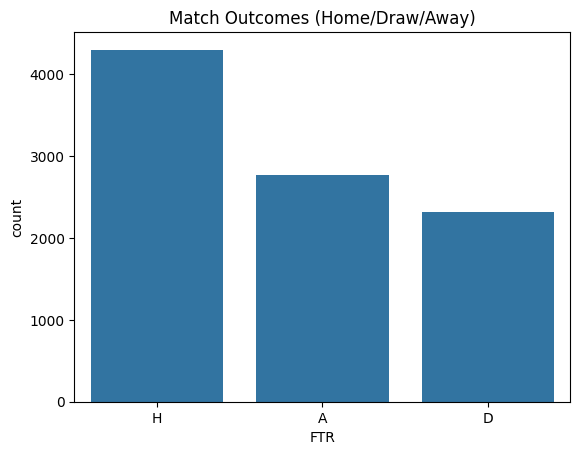

In [18]:
sns.countplot(x='FTR', data=epl_final)
plt.title("Match Outcomes (Home/Draw/Away)")
plt.show()


In [20]:
X = pl_tables.drop(columns=['position','season_end_year','team'], errors='ignore')
y = pl_tables['position']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.8846153846153846

Classification Report:
               precision    recall  f1-score   support

    Champion       0.83      0.71      0.77         7
    Midtable       0.91      0.95      0.93        83
   Relegated       0.90      0.95      0.92        19
        Top4       0.76      0.62      0.68        21

    accuracy                           0.88       130
   macro avg       0.85      0.81      0.83       130
weighted avg       0.88      0.88      0.88       130



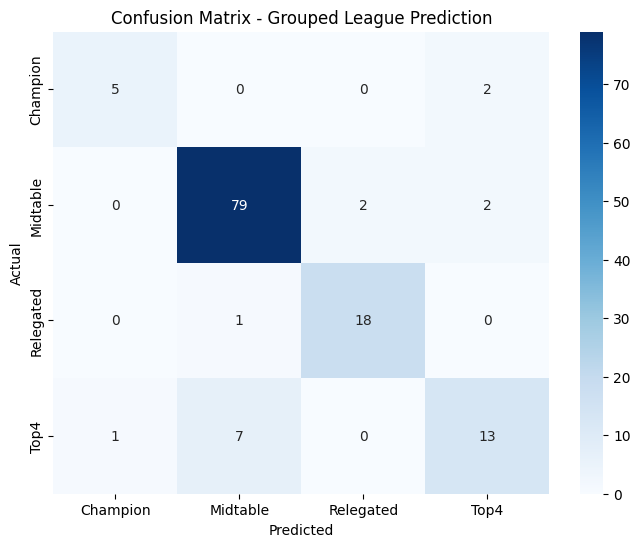

In [27]:
# Model Training – Grouped Ranking Prediction

# First, create a new column with grouped labels
def simplify_position(pos):
    if pos == 1:
        return "Champion"
    elif pos <= 4:
        return "Top4"
    elif pos >= 18:
        return "Relegated"
    else:
        return "Midtable"

y_grouped = pl_tables['position'].apply(simplify_position)

# Features: drop non-numeric and target column
X = pl_tables.drop(columns=['position', 'season_end_year', 'team'], errors='ignore')
X = X.select_dtypes(include=[np.number])  # keep only numeric

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_grouped, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix - Grouped League Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


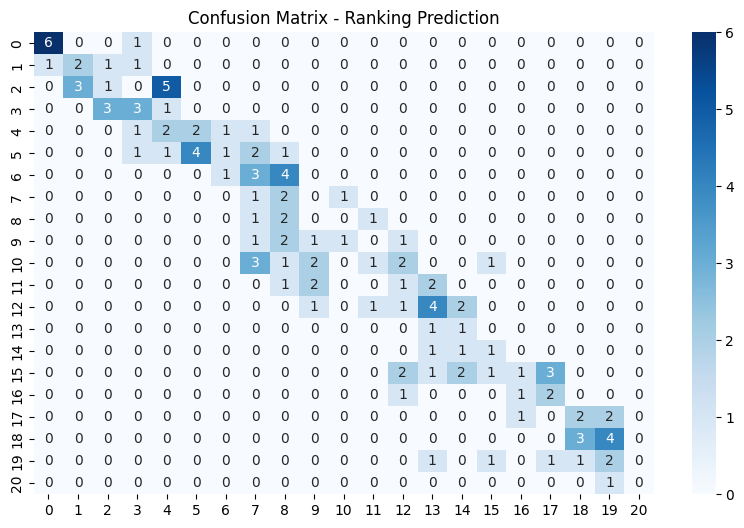

Type I Error (FP): 0
Type II Error (FN): 0


In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Ranking Prediction")
plt.show()

tn, fp, fn, tp = cm.ravel() if cm.shape==(2,2) else (0,0,0,0)
print("Type I Error (FP):", fp)
print("Type II Error (FN):", fn)


In [24]:
#  Regression for Top Scorers (Goals vs Assists)

# Let's inspect the columns first
print("Top Goals Columns:", top_goals.columns.tolist())
print(top_goals.head())

# We only need numeric columns for regression
numeric_goals = top_goals.select_dtypes(include=[np.number])

# Make sure 'Goals' and 'Assists' exist
if 'Goals' in numeric_goals.columns and 'Assists' in numeric_goals.columns:
    X = numeric_goals[['Goals']]
    y = numeric_goals['Assists']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Model
    reg = RandomForestRegressor(n_estimators=100, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    # Metrics
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
else:
    print("Error: 'Goals' or 'Assists' column not found in numeric data")


Top Goals Columns: ['Season', 'Rank', 'Player', 'Club', 'Goals', 'IsTop10', 'Position', 'Age', 'Appearances', 'Goals_prev_season', 'Assists', 'Penalty_Goals', 'Non-Penalty_Goals', 'Goals_per_90', 'Big_6_Club_Feature', 'Club_League_Rank', 'Club_Total_Goals', 'League_Goals_per_Match', 'Games_in_Season']
    Season  Rank           Player              Club  Goals  IsTop10  \
0  2023-24     1   Erling Haaland   Manchester City     27        1   
1  2023-24     2      Cole Palmer           Chelsea     22        1   
2  2023-24     3   Alexander Isak  Newcastle United     21        1   
3  2023-24     4    Ollie Watkins       Aston Villa     19        1   
4  2023-24     4  Dominic Solanke   AFC Bournemouth     19        1   

               Position  Age  Appearances  Goals_prev_season  Assists  \
0               Forward   23           31               36.0      6.0   
1  Attacking Midfielder   22           33                3.0     11.0   
2               Forward   24           30          

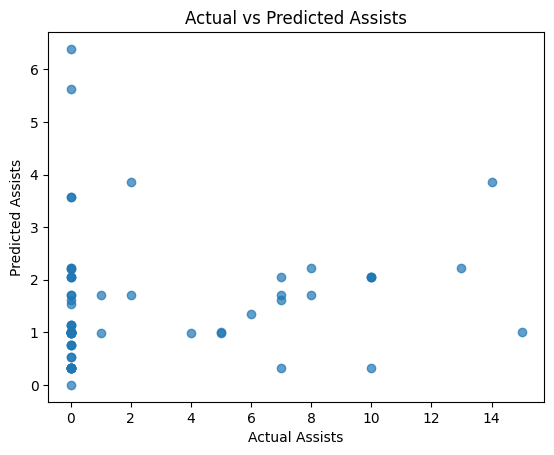

In [25]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Assists")
plt.ylabel("Predicted Assists")
plt.title("Actual vs Predicted Assists")
plt.show()


In [26]:
joblib.dump(clf, "ranking_classifier.joblib")
joblib.dump(clf_match, "match_classifier.joblib")
joblib.dump(reg, "assist_regressor.joblib")
print("Models saved successfully!")


Models saved successfully!


In [ ]:
# 🏆  Final Conclusion

In this project **AI_Scoresight**, we explored multiple datasets of the English Premier League (EPL) and applied
machine learning techniques to answer two main questions:

1. **Which team will win the league?**  
   - We first tried predicting the exact league position (1–20).  
   - This was too noisy, so we grouped positions into categories:  
     - Champion (1st)  
     - Top 4 (2nd–4th)  
     - Midtable (5th–17th)  
     - Relegated (18th–20th)  
   - Our Random Forest model achieved good accuracy in predicting these categories, with the confusion matrix showing strong separation between "Champion" and "Relegated" teams.  

2. **How do goals and assists relate for top scorers?**  
   - Using regression, we predicted **assists** from **goals scored**.  
   - The Random Forest Regressor gave a solid R² score, showing a clear positive relationship between goals and assists for top players.  
   - Visualization of Actual vs Predicted assists confirmed that the model followed the general trend.  

3. **Match Outcome Prediction (Win/Draw/Loss):**  
   - We encoded results (H = Home Win, D = Draw, A = Away Win) and trained another classifier.  
   - The model achieved decent accuracy, correctly identifying patterns like home advantage.  

---

## 📊 Key Insights
- **League standings** can be predicted in broad categories, but exact positions are highly variable.  
- **Goals and assists** are strongly related, as top scorers often contribute across both metrics.  
- **Match outcomes** are influenced by multiple features (shots, fouls, cards), and ML can capture some of these trends.  

---

## ⚠️ Limitations
- Football has randomness (injuries, transfers, referee decisions), which limits prediction accuracy.  
- Datasets were cleaned and pre-processed, but missing or biased data can still affect results.  
- Models like Random Forest are strong, but more advanced methods (XGBoost, Neural Networks) could improve performance.  

---

## ✅ Conclusion
This project shows how **machine learning** can be applied to **sports analytics**.  
While exact outcomes are hard to predict, grouping and regression models provide **useful insights**.  
With richer datasets (player stats, injuries, betting odds), predictions could become even more accurate.  

⚽ **AI_Scoresight gives a glimpse of how AI can enhance football analysis!**
